# Parameters and import data

In [2]:
# General import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random 
from scipy.stats import uniform,loguniform, randint

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

#sklearn import
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LearningCurveDisplay, learning_curve

# tensorflow import
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D,Dense, Dropout, Activation, Flatten
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L1,L2,L1L2




# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns

In [3]:
# parameters
n_eye_positions = 25
subject = 'sub-001'
roi = 'V1'

# uncomente for invibe 
# # defind data directory 
# # project_dir = '/home/ulascombes/disks/meso_shared/gaze_exp'
# project_dir = '~/disks/meso_shared/gaze_exp'
# pp_dir = '{}/derivatives/pp_data'.format(project_dir)
# df_fn = "{}/{}/desu".format(pp_dir,subject)

df_fn = '/Users/uriel/Documents/cours/DESU/final_project_no_git/data'

# # tsv runs names
# df_name_GazeLines ='df_task_GazeLines_{roi}_runs.tsv'.format(roi=roi)
# df_name_GazeColumns ='df_task_GazeColumns_{roi}_runs.tsv'.format(roi=roi)

# tsv avg names
df_name_GazeLines ='df_task_GazeLines_{roi}_avg.tsv'.format(roi=roi)
df_name_GazeColumns ='df_task_GazeColumns_{roi}_avg.tsv'.format(roi=roi)

# import datas 
df_gazelines =pd.read_table('{}/{}'.format(df_fn,df_name_GazeLines))
df_gazecolumns =pd.read_table('{}/{}'.format(df_fn,df_name_GazeColumns))

### drop 3 first TRs
df_gazelines = df_gazelines.drop(df_gazelines.index[:3]).reset_index(drop=True)
df_gazecolumns = df_gazecolumns.drop(df_gazecolumns.index[:3]).reset_index(drop=True)

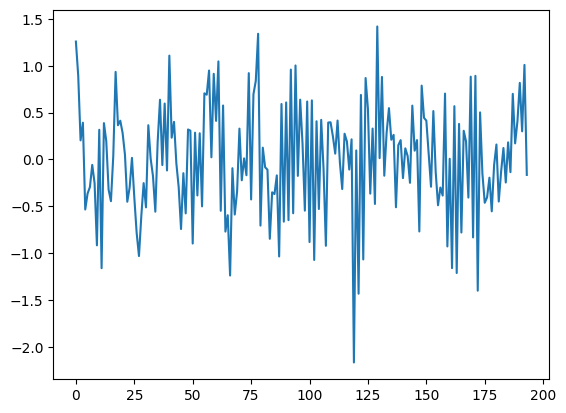

In [4]:
plt.plot(df_gazelines.index, df_gazelines['900'])

# Make an object with eye poisitions on gazelines runs

In [5]:
lines_positions = []
for i in range(n_eye_positions):
    a = i +1
    b = i +1
    lines_positions.append(a)
    lines_positions.append(b)
lines_positions_reverse = sorted(lines_positions, reverse=True)

lines_positions_0 = np.concatenate((lines_positions,lines_positions_reverse[2:]))
gazelines_position = np.concatenate((lines_positions_0,lines_positions_0[2:]))

# Make an object with eye positions on gazecolumns runs

In [6]:
columns_positions = [1,1,10,10,11,11,20,20,21,21,
                     22,22,19,19,12,12,9,9,2,2,
                     3,3,8,8,13,13,18,18,23,23,
                     24,24,17,17,14,14,7,7,4,4,
                     5,5,6,6,15,15,16,16,25,25]
                         
                        
                         
                         

columns_positions_reverse = sorted(columns_positions, reverse=True)

columns_positions_0 = np.concatenate((columns_positions,columns_positions_reverse[2:]))
gazecolumns_position = np.concatenate((columns_positions_0,columns_positions_0[2:]))

# Concate gazelines and gaze columns in axis =0

In [7]:
df_gaze_tot = pd.concat([df_gazelines,df_gazecolumns],axis=0).reset_index()

In [8]:
df_gaze_tot.shape

(388, 2366)

In [9]:
total_position = np.concatenate([gazelines_position,gazecolumns_position],axis=0)

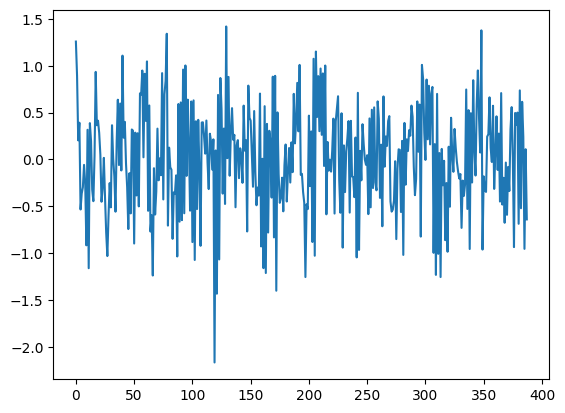

In [10]:
plt.plot(df_gaze_tot.index, df_gaze_tot['900'])

# Make a quarter visual field position object 

In [11]:
quarter_position_tot = np.zeros(len(total_position))

top_left = [1,2,10,9]
top_right = [4,5,7,6]
bottom_left = [20,19,21,21]
bottom_right = [17,16,24,25]
midl_left = [11,12]
midl_right = [14,15]
top_midl = [3,8]
bottom_midl = [18,23]
midl = [13]

for t in range(len(total_position)): 
    if total_position[t] in top_left:
        quarter_position_tot[t] = 1
        
    elif total_position[t] in top_right:
        quarter_position_tot[t] = 2
        
    elif total_position[t] in bottom_left:
        quarter_position_tot[t] = 3
        
    elif total_position[t] in bottom_right:
        quarter_position_tot[t] = 4
        
    elif total_position[t] in midl_left:
        quarter_position_tot[t] = 5

    elif total_position[t] in midl_right:
        quarter_position_tot[t] = 6
        
    elif total_position[t] in top_midl:
        quarter_position_tot[t] = 7
        
    elif total_position[t] in bottom_midl:
        quarter_position_tot[t] = 8
        
    elif total_position[t] in midl:
        quarter_position_tot[t] = 9
    


    

# Make a Half visual field position object 

In [12]:
midl_position_tot = np.zeros(len(total_position))

left =[1,2,10,9,11,12,20,19,21,22]
right = [4,5,7,6,14,15,17,16,24,25]
midl = [3,8,13,18,23]

for t in range(len(total_position)): 
    if total_position[t] in left:
        midl_position_tot[t] = 1
        
    elif total_position[t] in right:
        midl_position_tot[t] = 2
        
    elif total_position[t] in midl:
        midl_position_tot[t] = 3
        
    

# Decode position

### Split the data

# Machine Learning

In [13]:
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(df_gaze_tot, total_position,stratify=total_position,random_state=42)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(df_gaze_tot, quarter_position_tot,stratify=quarter_position_tot,random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_gaze_tot, midl_position_tot,stratify=midl_position_tot,random_state=42)



### Model 0 : Dummy 

In [14]:
# model fit 
model_0 = DummyClassifier(strategy="uniform",random_state=42)

# 25 labels 
model_0.fit(X_train_25, y_train_25)
y_pred_train_0_25 = model_0.predict(X_train_25)
y_pred_test_0_25 = model_0.predict(X_test_25)


accuracy_score_train_0_25 = accuracy_score(y_pred_train_0_25, y_train_25)
accuracy_score_test_0_25 = accuracy_score(y_pred_test_0_25, y_test_25)



# 8 labels 
model_0.fit(X_train_8, y_train_8)
y_pred_train_0_8 = model_0.predict(X_train_8)
y_pred_test_0_8 = model_0.predict(X_test_8)

accuracy_score_train_0_8 = accuracy_score(y_pred_train_0_8, y_train_8)
accuracy_score_test_0_8 = accuracy_score(y_pred_test_0_8, y_test_8)

# 3 labels
model_0.fit(X_train_3, y_train_3)
y_pred_train_0_3 = model_0.predict(X_train_3)
y_pred_test_0_3 = model_0.predict(X_test_3)

accuracy_score_train_0_3 = accuracy_score(y_pred_train_0_3, y_train_3)
accuracy_score_test_0_3 = accuracy_score(y_pred_test_0_3, y_test_3)

### Model 1 : SVC

In [15]:
# model fit 
best_model_1 = SVC(C = 0.0001152992457033021, gamma = 'auto',kernel='linear', random_state=42)

# 25 labels 
best_model_1.fit(X_train_25, y_train_25)
y_pred_train_1_25 = best_model_1.predict(X_train_25)
y_pred_test_1_25 = best_model_1.predict(X_test_25)


accuracy_score_train_1_25 = accuracy_score(y_pred_train_1_25, y_train_25)
accuracy_score_test_1_25 = accuracy_score(y_pred_test_1_25, y_test_25)



# 8 labels 
best_model_1.fit(X_train_8, y_train_8)
y_pred_train_1_8 = best_model_1.predict(X_train_8)
y_pred_test_1_8 = best_model_1.predict(X_test_8)

accuracy_score_train_1_8 = accuracy_score(y_pred_train_1_8, y_train_8)
accuracy_score_test_1_8 = accuracy_score(y_pred_test_1_8, y_test_8)

# 3 labels
best_model_1.fit(X_train_3, y_train_3)
y_pred_train_1_3 = best_model_1.predict(X_train_3)
y_pred_test_1_3 = best_model_1.predict(X_test_3)

accuracy_score_train_1_3 = accuracy_score(y_pred_train_1_3, y_train_3)
accuracy_score_test_1_3 = accuracy_score(y_pred_test_1_3, y_test_3)


In [19]:
# fig = LearningCurveDisplay.from_estimator(best_model_1, df_gaze_tot, total_position)
#fig.figure_.suptitle('learning_curve_svc_25_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_svc_25_{}'.format(roi))

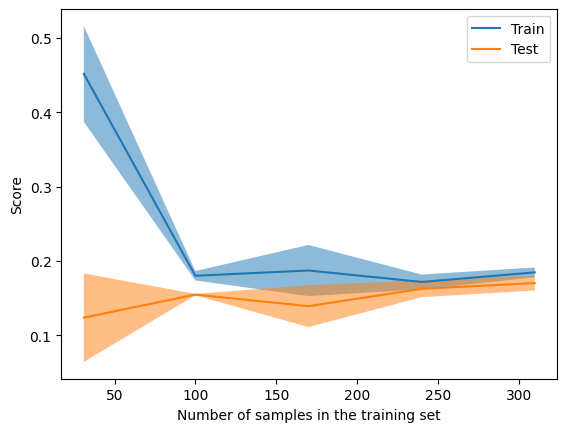

In [17]:
# fig = LearningCurveDisplay.from_estimator(best_model_1, df_gaze_tot, quarter_position_tot)
#fig.figure_.suptitle('learning_curve_svc_3_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_svc_9_{}'.format(roi))


In [20]:
# fig = LearningCurveDisplay.from_estimator(best_model_1, df_gaze_tot, midl_position_tot)
#fig.figure_.suptitle('learning_curve_svc_9_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_svc_3_{}'.format(roi))


### Model 2 : Logistic regression

In [21]:
# model fit 
best_model_2 = LogisticRegression(C=0.05326656310426435,fit_intercept=False,penalty='l1',solver='saga', multi_class = 'multinomial',random_state=42)

# 25 labels 
best_model_2.fit(X_train_25, y_train_25)
y_pred_train_2_25 = best_model_2.predict(X_train_25)
y_pred_test_2_25 = best_model_2.predict(X_test_25)


accuracy_score_train_2_25 = accuracy_score(y_pred_train_2_25, y_train_25)
accuracy_score_test_2_25 = accuracy_score(y_pred_test_2_25, y_test_25)



# 8 labels 
best_model_2.fit(X_train_8, y_train_8)
y_pred_train_2_8 = best_model_2.predict(X_train_8)
y_pred_test_2_8 = best_model_2.predict(X_test_8)

accuracy_score_train_2_8 = accuracy_score(y_pred_train_2_8, y_train_8)
accuracy_score_test_2_8 = accuracy_score(y_pred_test_2_8, y_test_8)

# 3 labels
best_model_2.fit(X_train_3, y_train_3)
y_pred_train_2_3 = best_model_2.predict(X_train_3)
y_pred_test_2_3 = best_model_2.predict(X_test_3)

accuracy_score_train_2_3 = accuracy_score(y_pred_train_2_3, y_train_3)
accuracy_score_test_2_3 = accuracy_score(y_pred_test_2_3, y_test_3)



In [22]:
# fig = LearningCurveDisplay.from_estimator(best_model_2, df_gaze_tot, total_position)
#fig.figure_.suptitle('learning_curve_logistic_25_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_logistic_25_{}'.format(roi))

In [23]:
# fig = LearningCurveDisplay.from_estimator(best_model_2, df_gaze_tot, quarter_position_tot)
#fig.figure_.suptitle('learning_curve_logistic_9_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_logistic_9_{}'.format(roi))

In [24]:
# fig = LearningCurveDisplay.from_estimator(best_model_2, df_gaze_tot, midl_position_tot)
#fig.figure_.suptitle('learning_curve_logistic_3_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_logistic_3_{}'.format(roi))

### Model 3 : Gradient Boosting

In [38]:
# model fit 
best_model_3 = GradientBoostingClassifier(n_estimators=100,min_samples_split=0.1,min_samples_leaf=0.2,max_depth=3,random_state=42)


# # 25 labels 
# best_model_3.fit(X_train_25, y_train_25)
# y_pred_train_3_25 = best_model_3.predict(X_train_25)
# y_pred_test_3_25 = best_model_3.predict(X_test_25)


# accuracy_score_train_3_25 = accuracy_score(y_pred_train_3_25, y_train_25)
# accuracy_score_test_3_25 = accuracy_score(y_pred_test_3_25, y_test_25)



# # 8 labels 
# best_model_3.fit(X_train_8, y_train_8)
# y_pred_train_3_8 = best_model_3.predict(X_train_8)
# y_pred_test_3_8 = best_model_3.predict(X_test_8)

# accuracy_score_train_3_8 = accuracy_score(y_pred_train_3_8, y_train_8)
# accuracy_score_test_3_8 = accuracy_score(y_pred_test_3_8, y_test_8)

# # 3 labels
# best_model_3.fit(X_train_3, y_train_3)
# y_pred_train_3_3 = best_model_3.predict(X_train_3)
# y_pred_test_3_3 = best_model_3.predict(X_test_3)

# accuracy_score_train_3_3 = accuracy_score(y_pred_train_3_3, y_train_3)
# accuracy_score_test_3_3 = accuracy_score(y_pred_test_3_3, y_test_3)





In [ ]:
# fig = LearningCurveDisplay.from_estimator(best_model_3, df_gaze_tot, total_position)
#fig.figure_.suptitle('learning_curve_logistic_25_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_gradient_25_{}'.format(roi))

In [ ]:
# fig = LearningCurveDisplay.from_estimator(best_model_3, df_gaze_tot, quarter_position_tot)
#fig.figure_.suptitle('learning_curve_logistic_9_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_gradient_9_{}'.format(roi))

In [ ]:
# fig = LearningCurveDisplay.from_estimator(best_model_3, df_gaze_tot, midl_position_tot)
#fig.figure_.suptitle('learning_curve_logistic_3_{}'.format(roi), fontsize=16)
#fig.figure_.savefig('/Users/uriel/Desktop/projet_desu/result/figures/learning_curv/learning_curve_gradient_3_{}'.format(roi))

# Final result

In [32]:
# # with gradient boosting
# accuracys = [accuracy_score_test_0_25,accuracy_score_test_0_8,accuracy_score_test_0_3,
#              accuracy_score_test_3_25,accuracy_score_test_3_8,accuracy_score_test_3_3,
#              accuracy_score_test_2_25,accuracy_score_test_2_8,accuracy_score_test_2_3,
#              accuracy_score_test_1_25,accuracy_score_test_1_8,accuracy_score_test_1_3,
#            ]

# models = ['Dummy_Classfier','Dummy_Classfier','Dummy_Classfier',
#           'Gradient_Boosting', 'Gradient_Boosting','Gradient_Boosting',
#           'Logistic_regression','Logistic_regression','Logistic_regression',
#           'SVC','SVC','SVC', 
#         ]

# N_labels = ['25_positions','9_positions','3_positions',
#             '25_positions','9_positions','3_positions',
#             '25_positions','9_positions','3_positions',
#             '25_positions','9_positions','3_positions',
#            ]

In [25]:
# # without gradient boosting
accuracys = [accuracy_score_test_0_25,accuracy_score_test_0_8,accuracy_score_test_0_3,
             accuracy_score_test_2_25,accuracy_score_test_2_8,accuracy_score_test_2_3,
             accuracy_score_test_1_25,accuracy_score_test_1_8,accuracy_score_test_1_3,
           ]

models = ['Dummy_Classfier','Dummy_Classfier','Dummy_Classfier',
          'Logistic_regression','Logistic_regression','Logistic_regression',
          'SVC','SVC','SVC', 
        ]

N_labels = ['25_positions','9_positions','3_positions',
            '25_positions','9_positions','3_positions',
            '25_positions','9_positions','3_positions',
           ]

In [26]:
final_dict = {'models': models,'N_labels' : N_labels,'accuracys':accuracys}
final_df = pd.DataFrame(final_dict)

# save group data avg

final_df.to_csv('/Users/uriel/Documents/cours/DESU/final_project_no_git/result/final_tsv/final_df_{roi}_avg.tsv'.format(roi=roi), sep="\t", na_rep='NaN')

# # save group data runs
# final_df.to_csv('/Users/uriel/Desktop/projet_desu/result/final_tsv/final_tsvfinal_df_{roi}.tsv'.format(roi=roi), sep="\t", na_rep='NaN')

# Matrice de confusion

<Figure size 640x480 with 0 Axes>

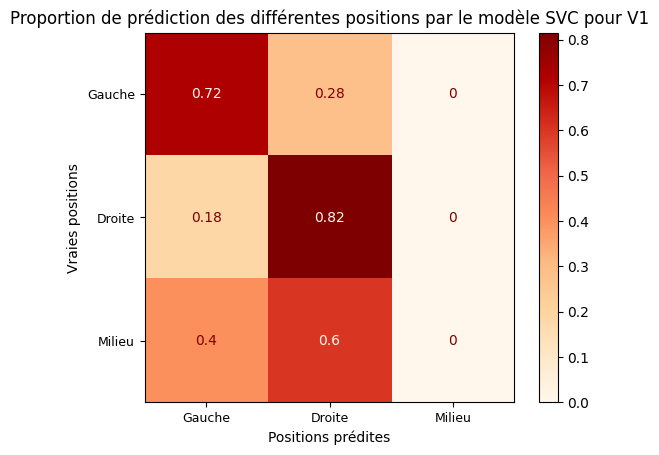

In [27]:
cm2 = confusion_matrix(y_true=y_test_3, y_pred=y_pred_test_1_3,normalize ='true')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

plt.figure()
disp2.plot(cmap='OrRd')

plt.xticks([0,1,2],['Gauche','Droite','Milieu'],fontsize= 9)
plt.yticks([0,1,2],['Gauche','Droite','Milieu'],fontsize= 9)
plt.xlabel('Positions prédites',fontsize= 10)
plt.ylabel('Vraies positions',fontsize= 10)
plt.title("Proportion de prédiction des différentes positions par le modèle SVC pour {roi}".format(roi=roi))
# plt.savefig('/Users/uriel/Desktop/projet_desu/result/figures/confusion_matrix/matrice_confusion_3_SVC_{roi}.png'.format(roi=roi))
# avg save
# plt.savefig('/Users/uriel/Desktop/projet_desu/result/figures/confusion_matrix/matrice_confusion_3_SVC_{roi}_avg.png'.format(roi=roi))
plt.show()



<Figure size 640x480 with 0 Axes>

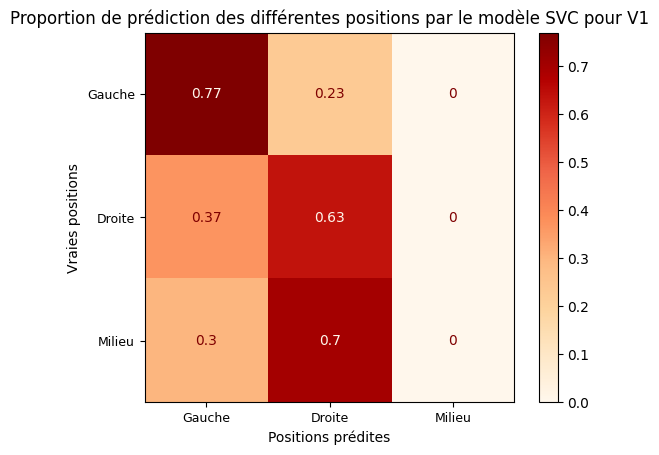

In [28]:
cm2 = confusion_matrix(y_true=y_test_3, y_pred=y_pred_test_2_3,normalize ='true')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

plt.figure()
disp2.plot(cmap='OrRd')

plt.xticks([0,1,2],['Gauche','Droite','Milieu'],fontsize= 9)
plt.yticks([0,1,2],['Gauche','Droite','Milieu'],fontsize= 9)
plt.xlabel('Positions prédites',fontsize= 10)
plt.ylabel('Vraies positions',fontsize= 10)
plt.title("Proportion de prédiction des différentes positions par le modèle SVC pour {roi}".format(roi=roi))
# plt.savefig('/Users/uriel/Desktop/projet_desu/result/figures/confusion_matrix/matrice_confusion_3_Logistic_{roi}.png'.format(roi=roi))
# plt.savefig('/Users/uriel/Desktop/projet_desu/result/figures/confusion_matrix/matrice_confusion_3_Logistic_{roi}_avg.png'.format(roi=roi))
plt.show()


